## t-SNE
Using t-SNE (https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) as a first stab at trying to determine specialness of `L = 64` lattice size. Just using simple `sklearn` implementation for ease

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

In [2]:
# Stuff to make the plots look nice

params = {
    "text.usetex": True,
    "font.family": "serif",
    "legend.fontsize": 10,
    "figure.figsize": (10, 3),
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 2,
    "lines.markeredgewidth": 0.8,
    "lines.markersize": 5,
    "lines.marker": "o",
    "patch.edgecolor": "black",
    "pgf.rcfonts": False,
}
plt.rcParams.update(params)
plt.style.use("seaborn-deep")

In [4]:
# Load in data and store in dictionary

lattice_sizes = [58, 60, 62, 64, 66, 68, 70,]
data_dict = {}

for size in lattice_sizes:
    file_path = "../data_Aug20/L{0}/T0.406569.dat.gz".format(size)
    data = np.loadtxt(file_path)
    data_dict[size] = data

In [13]:
embedded_data_dict = {}

for size in lattice_sizes:
    embedded_data = TSNE(n_components=2, perplexity=30, learning_rate=200).fit_transform(data_dict[size])
    embedded_data_dict[size] = embedded_data

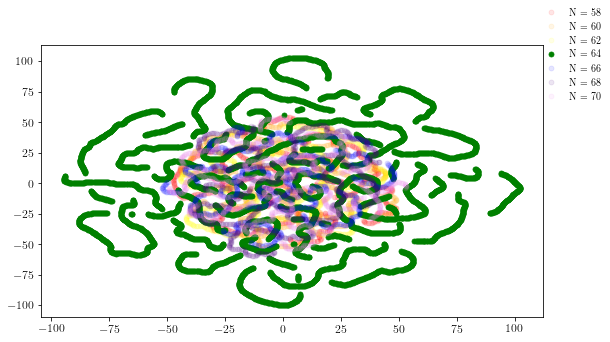

In [20]:
size_colors = {58: "red", 60: "orange", 62: "yellow", 64: "green", 66: "blue", 68: "indigo", 70: "violet"}

fig, ax = plt.subplots(figsize=(9,5))

for size in lattice_sizes:
    plot_data = embedded_data_dict[size]
    ax.plot(plot_data[:,0],
            plot_data[:,1],
            "o",
            alpha=0.1 if size != 64 else 1,
            color=size_colors[size],
#             markersize=4,
            label="N = {0}".format(size)
           )

    
fig.legend(frameon=False)

plt.savefig("t-SNE_plots/t-SNE_default_params.pdf", bbox_inches="tight")

/home/smorawetz/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


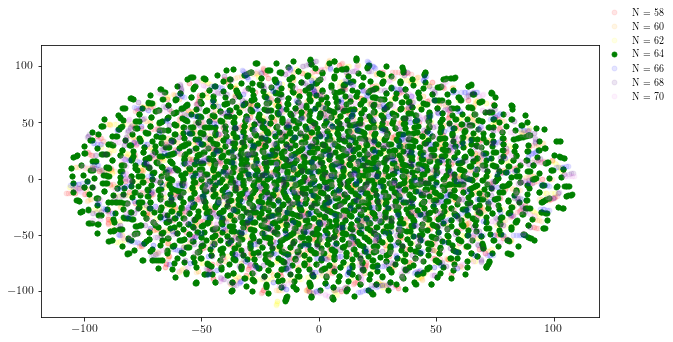

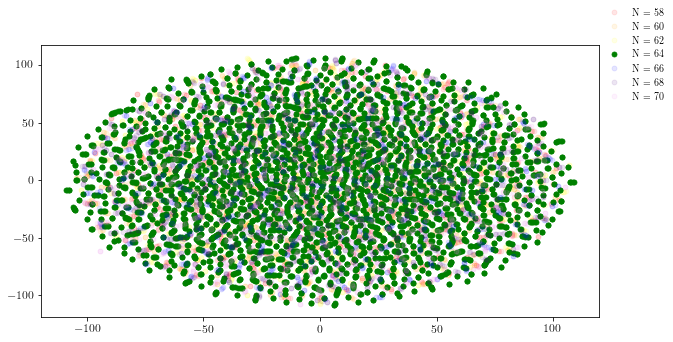

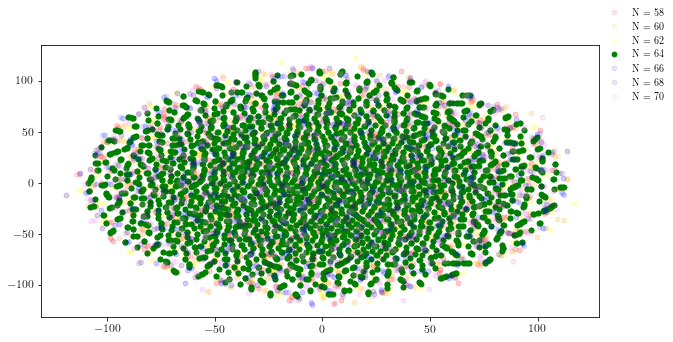

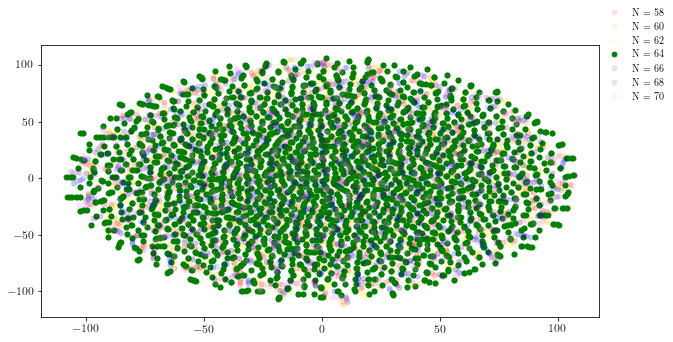

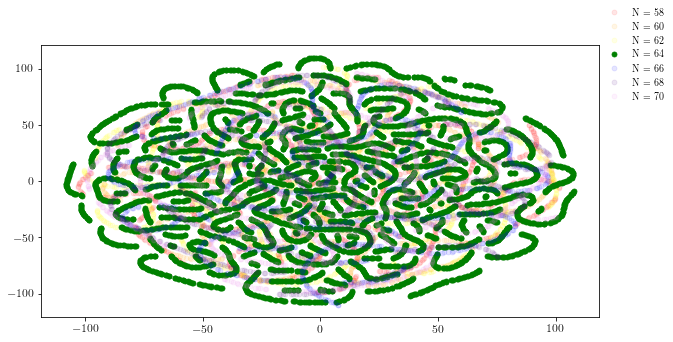

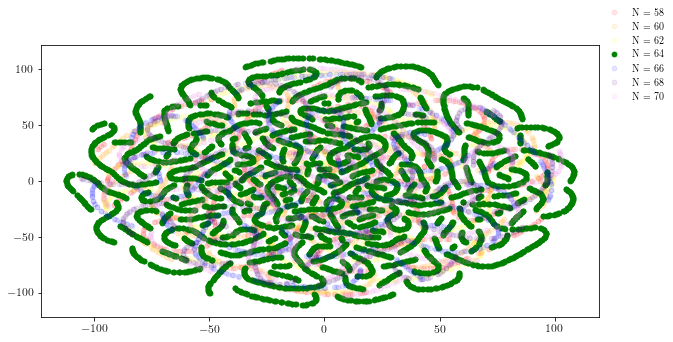

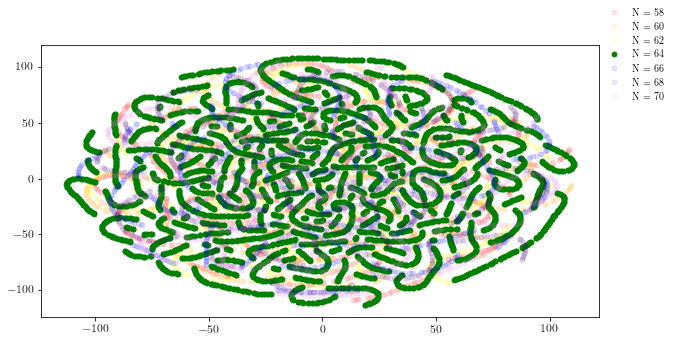

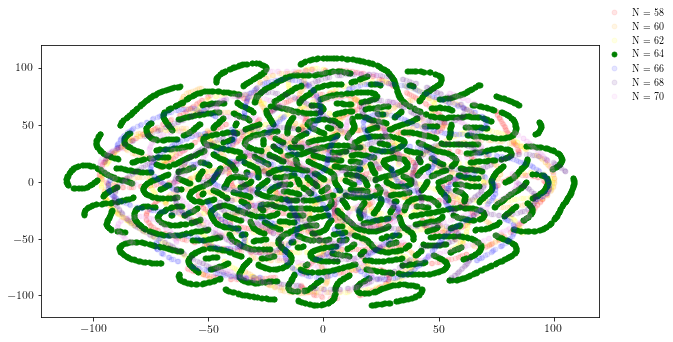

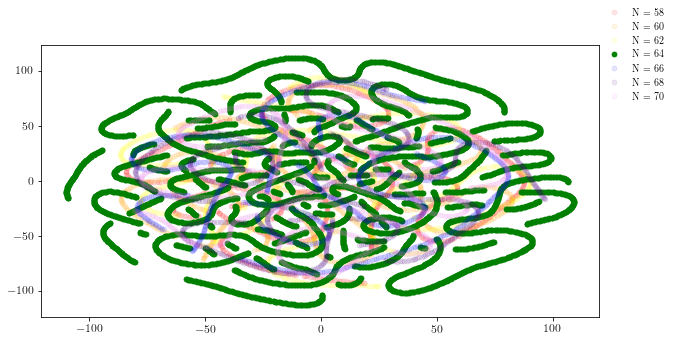

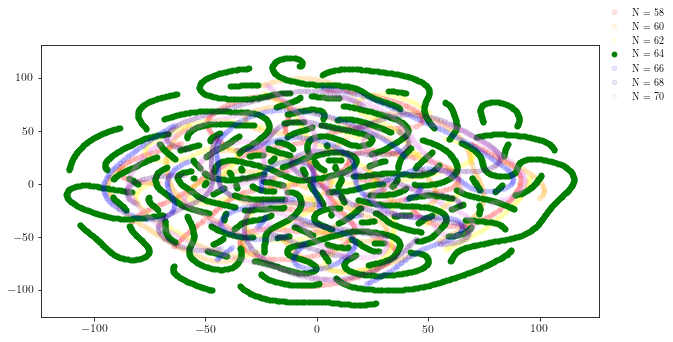

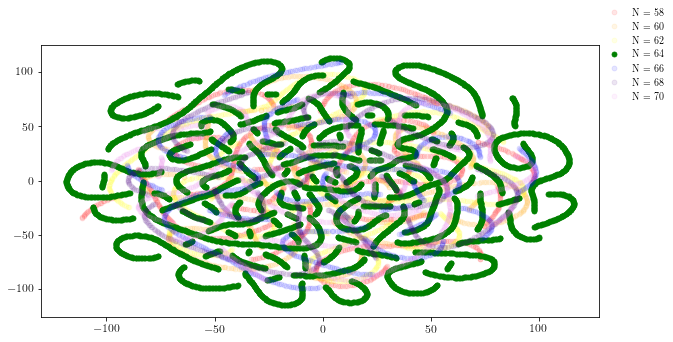

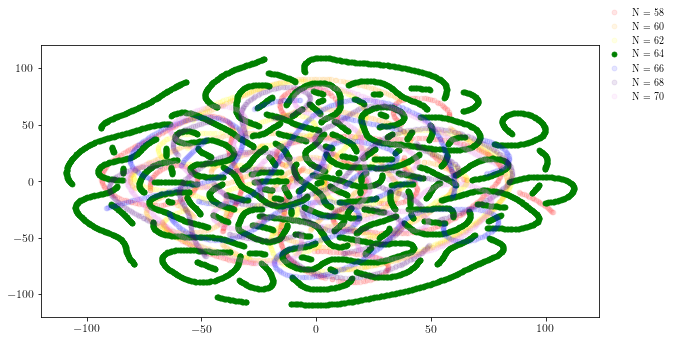

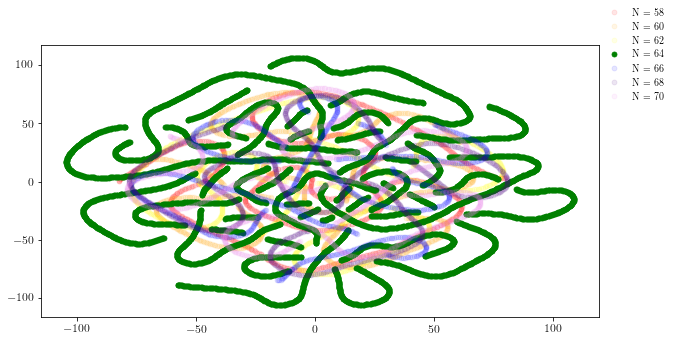

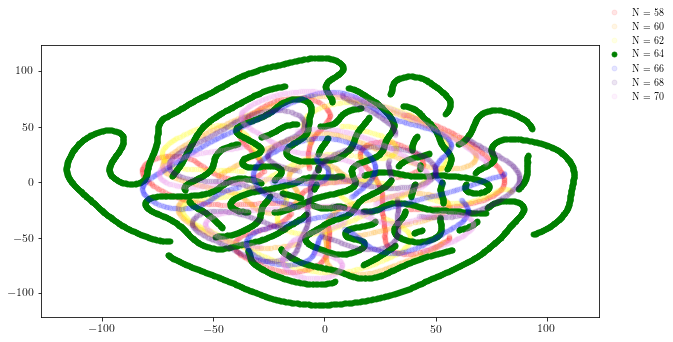

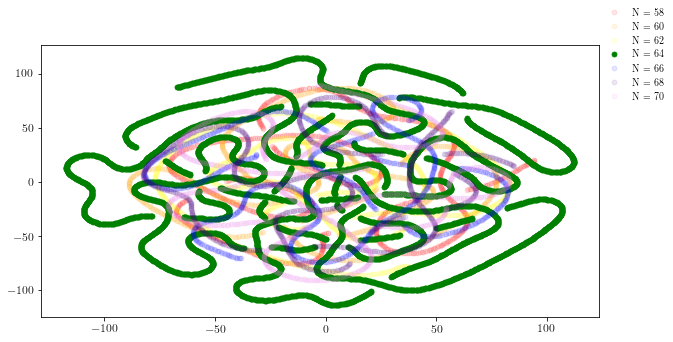

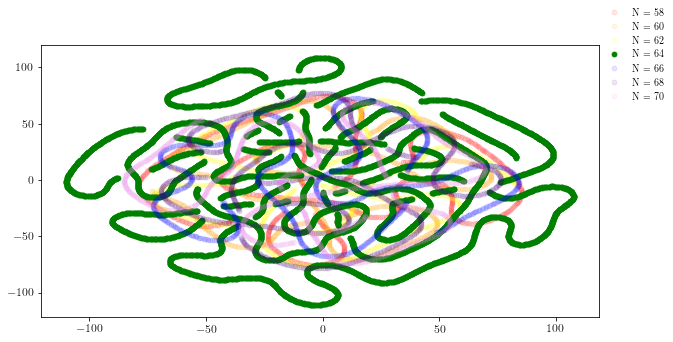

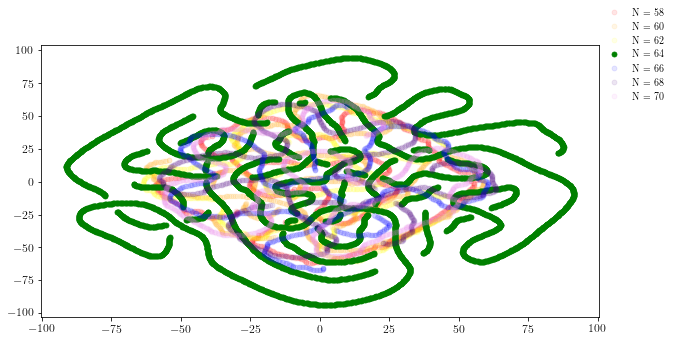

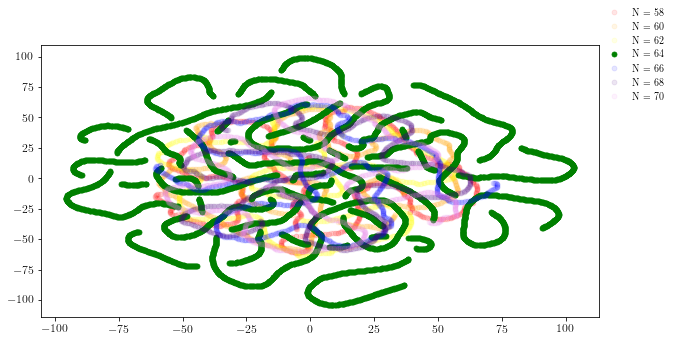

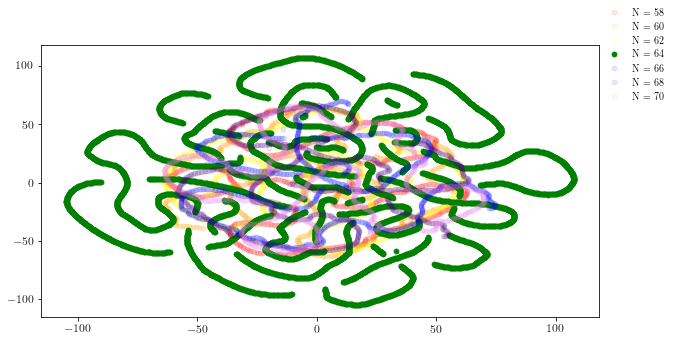

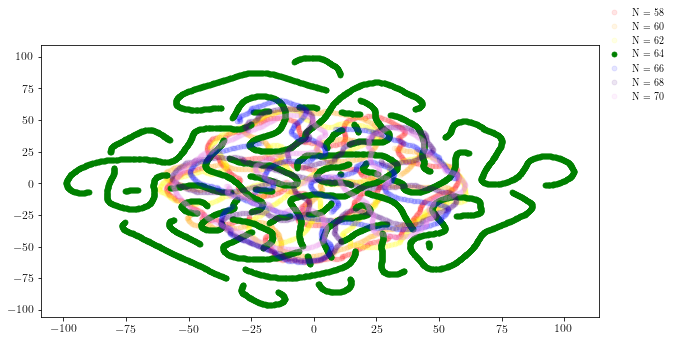

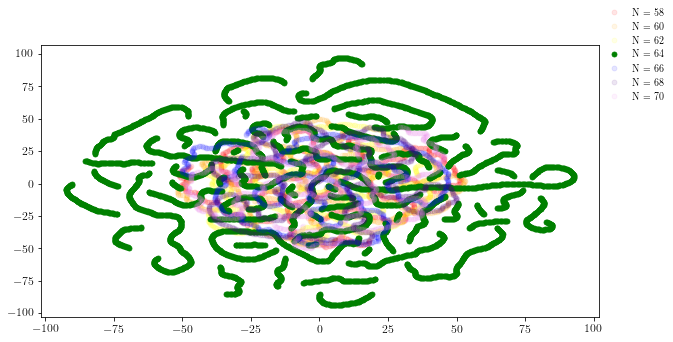

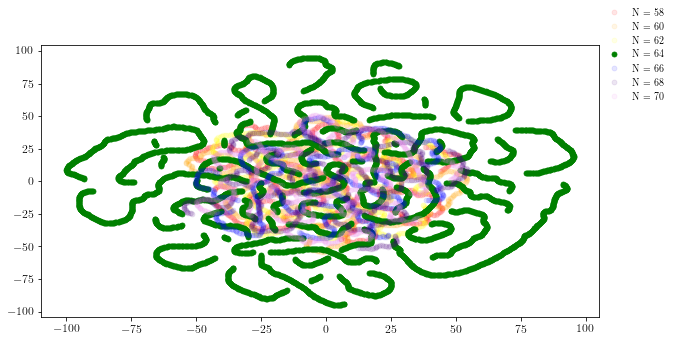

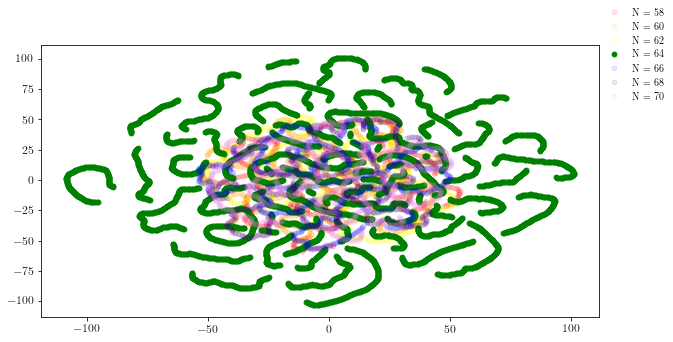

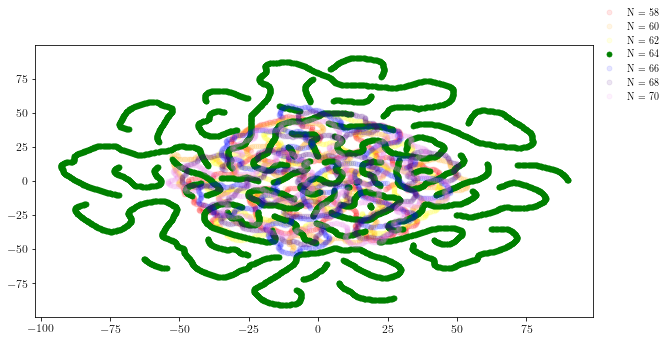

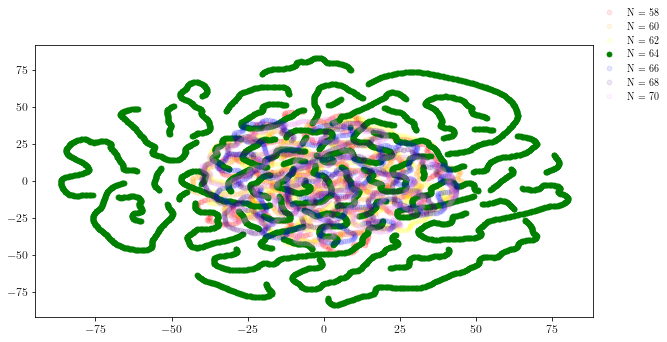

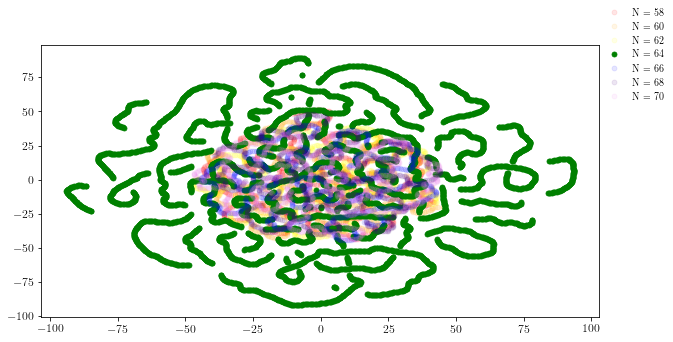

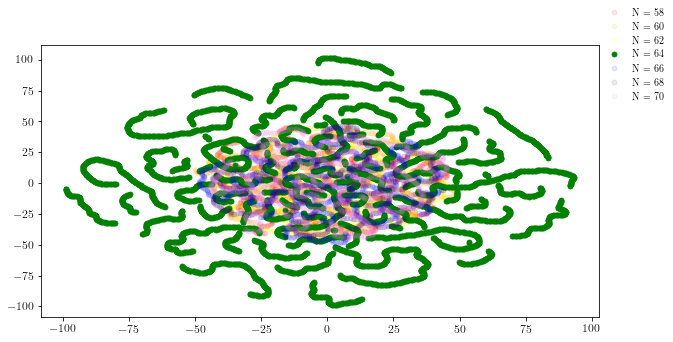

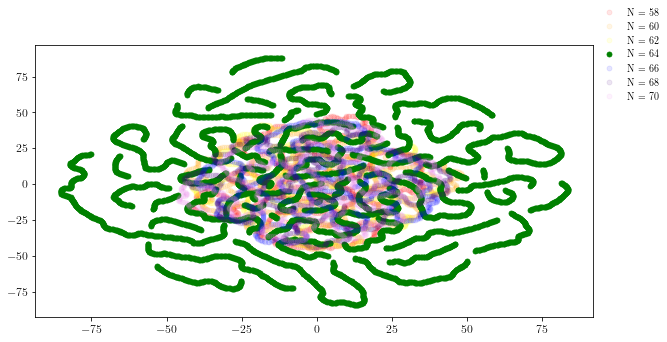

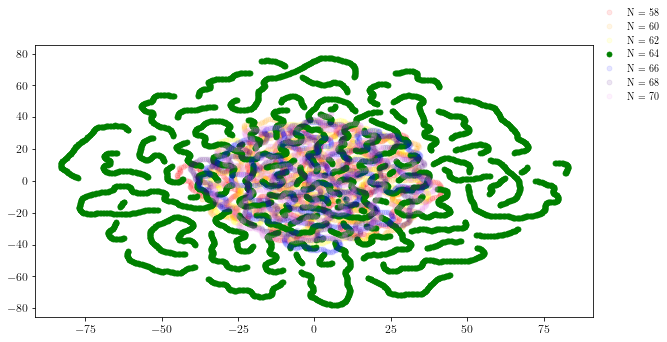

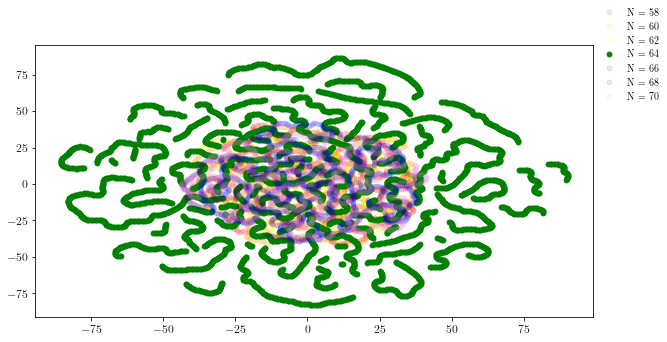

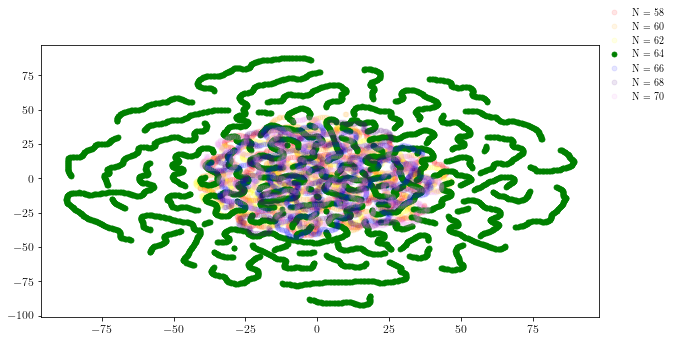

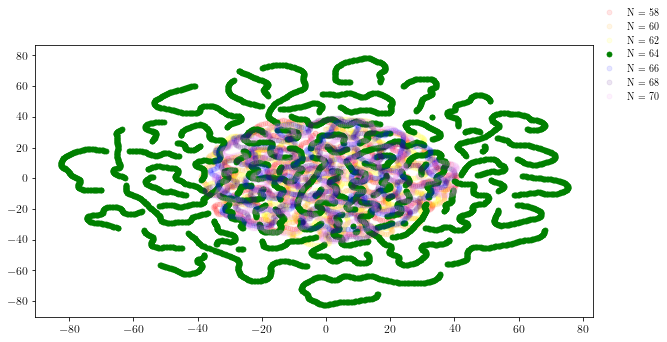

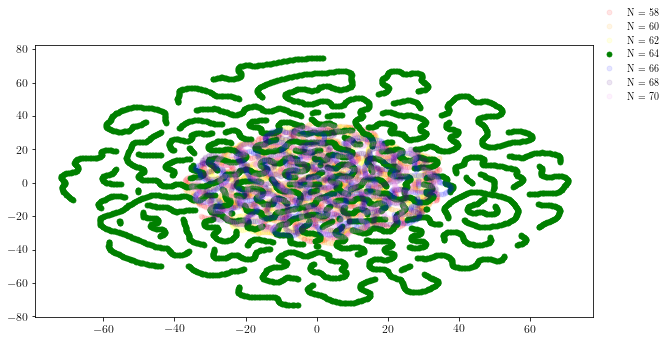

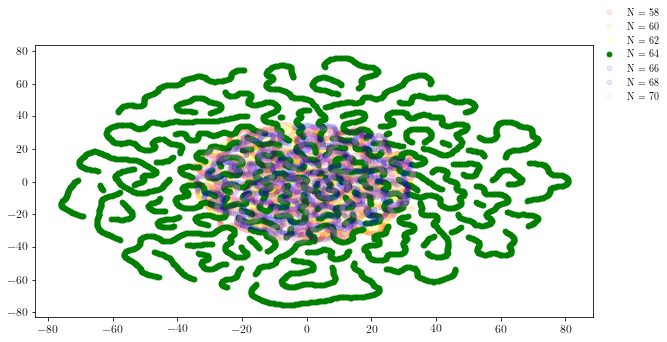

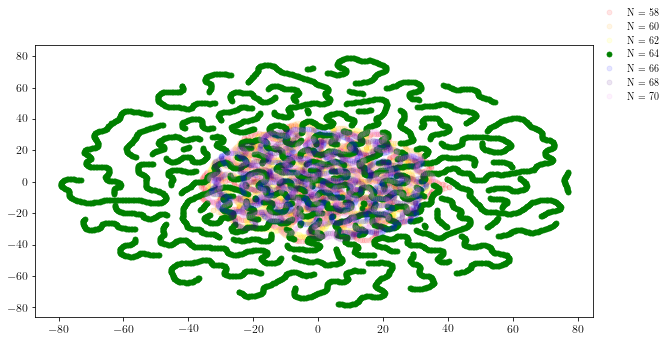

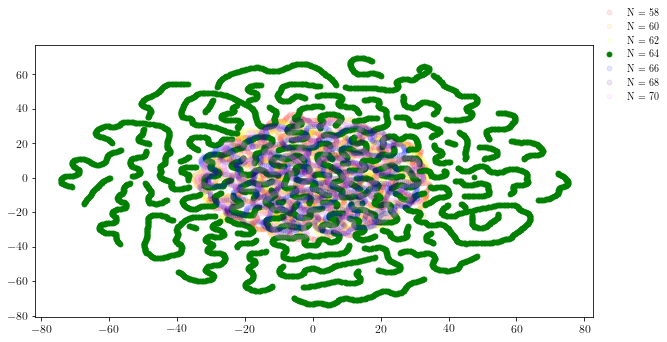

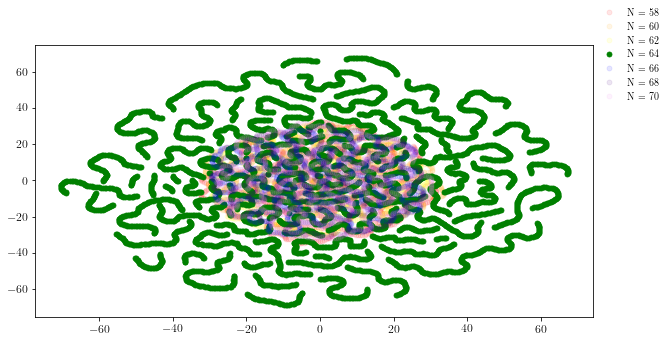

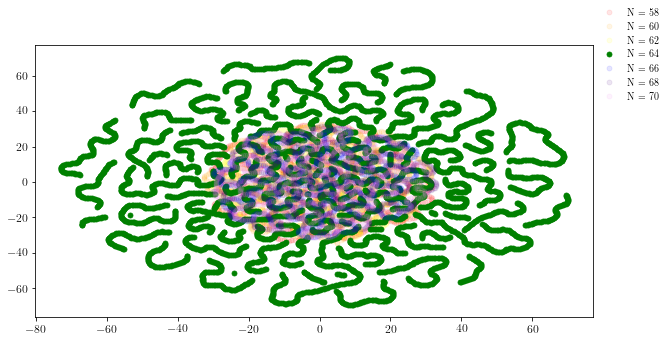

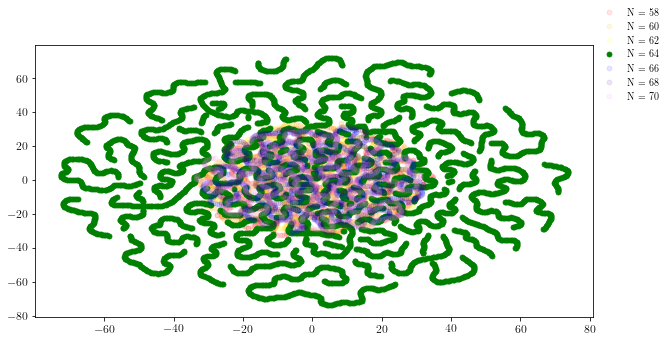

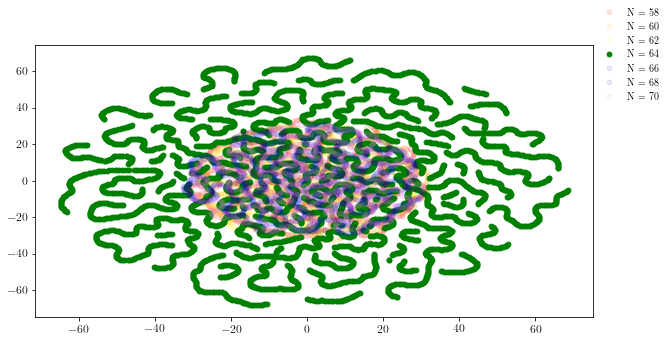

In [59]:
# Doing the same thing but optimizing hyperparameters

perp_list = [1,2, 5, 10, 20, 30, 40, 50, 75, 100]
lr_list = [100, 200, 500]

for perp in perp_list:
    for lr in lr_list:
        embedded_data_dict = {}

        for size in lattice_sizes:
            embedded_data = TSNE(n_components=2, perplexity=perp, learning_rate=lr).fit_transform(data_dict[size])
            embedded_data_dict[size] = embedded_data

        size_colors = {58: "red", 60: "orange", 62: "yellow", 64: "green", 66: "blue", 68: "indigo", 70: "violet"}

        fig, ax = plt.subplots(figsize=(10,5))

        for size in lattice_sizes:
            plot_data = embedded_data_dict[size]
            ax.plot(plot_data[:,0],
                    plot_data[:,1],
                    "o",
                    alpha=0.1 if size != 64 else 1,
                    color=size_colors[size],
        #             markersize=4,
                    label="N = {0}".format(size)
                   )


        fig.legend(frameon=False)

        plt.savefig("plots/t-SNE_perp{0}_lr{1}.pdf".format(perp, lr), bbox_inches="tight")

In [ ]:
# Doing the same thing but optimizing hyperparameters

perp_list = [1,2, 5, 10, 20, 30, 40, 50, 75, 100]
lr_list = [1000]

for perp in perp_list:
    for lr in lr_list:
        embedded_data_dict = {}

        for size in lattice_sizes:
            embedded_data = TSNE(n_components=2, perplexity=perp, learning_rate=lr).fit_transform(data_dict[size])
            embedded_data_dict[size] = embedded_data

        size_colors = {58: "red", 60: "orange", 62: "yellow", 64: "green", 66: "blue", 68: "indigo", 70: "violet"}

        fig, ax = plt.subplots(figsize=(10,5))

        for size in lattice_sizes:
            plot_data = embedded_data_dict[size]
            ax.plot(plot_data[:,0],
                    plot_data[:,1],
                    "o",
                    alpha=0.1 if size != 64 else 1,
                    color=size_colors[size],
        #             markersize=4,
                    label="N = {0}".format(size)
                   )


        fig.legend(frameon=False)

        plt.savefig("plots/t-SNE_perp{0}_lr{1}.pdf".format(perp, lr), bbox_inches="tight")

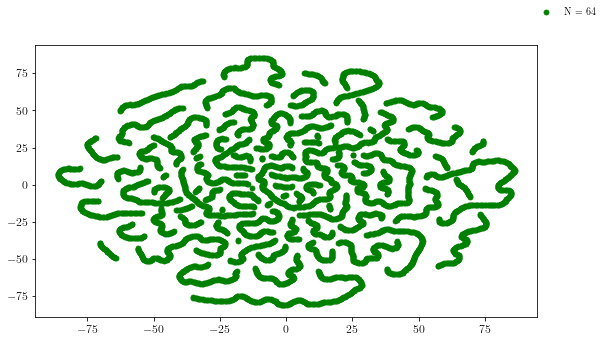

In [26]:
# Doing the same thing but optimizing hyperparameters

perp_list = [50]
lr_list = [200]

for perp in perp_list:
    for lr in lr_list:
        embedded_data_dict = {}

        for size in lattice_sizes:
            embedded_data = TSNE(n_components=2, perplexity=perp, learning_rate=lr).fit_transform(data_dict[size])
            embedded_data_dict[size] = embedded_data

for perp in perp_list:
    for lr in lr_list:
        size_colors = {58: "red", 60: "orange", 62: "yellow", 64: "green", 66: "blue", 68: "indigo", 70: "violet"}

        fig, ax = plt.subplots(figsize=(9,5))

        for size in lattice_sizes:
            plot_data = embedded_data_dict[size]
            ax.plot(plot_data[:,0],
                    plot_data[:,1],
                    "o",
                    
                    alpha=0.1 if size != 64 else 1,
                    color=size_colors[size],
        #             markersize=4,
                    label="N = {0}".format(size)
                   )


        fig.legend(frameon=False)

        plt.savefig("t-SNE_plots/t-SNE_perp{0}_lr{1}.pdf".format(perp, lr), bbox_inches="tight")

No handles with labels found to put in legend.


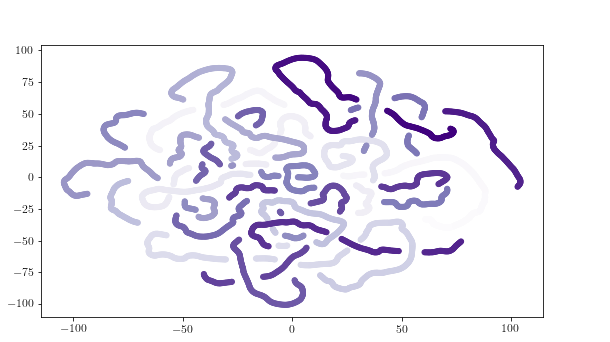

In [27]:
import matplotlib.cm as cmx
import matplotlib.colors as colors


# Plot evolution of points on a color gradient

perp_list = [30]
lr_list = [200]

lattice_sizes = [64]

for perp in perp_list:
    for lr in lr_list:
        embedded_data_dict = {}

        for size in lattice_sizes:
            embedded_data = TSNE(n_components=2, perplexity=perp, learning_rate=lr).fit_transform(data_dict[size])
            embedded_data_dict[size] = embedded_data
            
            
for perp in perp_list:
    for lr in lr_list:
        size_colors = {58: "red", 60: "orange", 62: "yellow", 64: "green", 66: "blue", 68: "indigo", 70: "violet"}

        fig, ax = plt.subplots(figsize=(9,5))

        for size in lattice_sizes:
            plot_data = embedded_data_dict[size]
            ax.scatter(plot_data[:,0],
                    plot_data[:,1],
                    c=np.arange(len(plot_data[:,0])),
                    cmap="Purples"
                      )


        fig.legend(frameon=False)

        plt.savefig("t-SNE_plots/t-SNE_seq_perp{0}_lr{1}.pdf".format(perp, lr), bbox_inches="tight")